In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from ruspy.data.data_reading import data_reading
from ruspy.data.data_processing import data_processing

from ruspy.estimation.estimation import estimate
from ruspy.estimation.estimation_cost_parameters import (
    converge_choice,
    lin_cost,
    cost_func,
    create_transition_matrix,
)
from ruspy.simulation.robust_sim import get_worst_trans

In [2]:
beta = 0.9999
init_dict = {
    "groups": "group_4",
    "beta": beta,
    "maint_func": "linear",
    "binsize": 5000,
    "states": 90,
}

data_reading()
repl_data = data_processing(init_dict)
trans_results, cost_results = estimate(init_dict, repl_data, repl_4=True)
trans_results, cost_results

({'state_count': array([[68, 94,  9, ...,  0,  0,  0],
         [ 0, 44, 59, ...,  0,  0,  0],
         [ 0,  0, 47, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  1,  1,  0],
         [ 0,  0,  0, ...,  0,  1,  1],
         [ 0,  0,  0, ...,  0,  0,  1]]),
  'x': array([0.39189189, 0.59529357, 0.01281454]),
  'fun': 3140.5705570938244,
  'trans_count': array([1682, 2555,   55])},
       fun: 163.58583993344618
  hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
       jac: array([-1.16529009e-04, -3.69482223e-05])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 42
       nit: 12
    status: 0
   success: True
         x: array([10.07759093,  2.29408834]))

In [3]:
p_ml = trans_results["x"]
init_dict["known_trans"] = p_ml
num_states = 50
params = np.array([25, 150])
costs = cost_func(num_states, lin_cost, params)
init_dict["params"] = params
trans_mat_ml = create_transition_matrix(num_states, p_ml)
choice_ml = converge_choice(num_states, trans_mat_ml, costs, beta)

In [4]:
omega = 0.95
rho_full = chi2.ppf(omega, len(p_ml) - 1) / (2 * 4292)
worst_trans_full = get_worst_trans(init_dict, p_ml, rho_full, num_states)
print(worst_trans_full, np.sum(worst_trans_full))
trans_mat_full = create_transition_matrix(num_states, worst_trans_full)
choice_worst_full = converge_choice(num_states, trans_mat_full, costs, beta)

[0.37407968 0.61186251 0.0140578 ] 1.0


In [5]:
mean_obs = np.mean(np.sum(trans_results["state_count"], axis=1))
rho_mean = chi2.ppf(omega, len(p_ml) - 1) / (2 * mean_obs)
worst_trans_mean = get_worst_trans(init_dict, p_ml, rho_mean, num_states)
print(worst_trans_mean, np.sum(worst_trans_mean))
trans_mat_mean = create_transition_matrix(num_states, worst_trans_mean)
choice_worst_mean = converge_choice(num_states, trans_mat_mean, costs, beta)

[0.24230963 0.72882758 0.02886279] 1.0


In [6]:
ten_percent_obs = np.percentile(np.sum(trans_results["state_count"], axis=1), 10)
rho_ten = chi2.ppf(omega, len(p_ml) - 1) / (2 * ten_percent_obs)
worst_trans_ten_percent = get_worst_trans(init_dict, p_ml, rho_ten, num_states)
print(worst_trans_ten_percent, np.sum(worst_trans_ten_percent))
trans_mat_ten = create_transition_matrix(num_states, worst_trans_ten_percent)
choice_worst_ten_percent = converge_choice(num_states, trans_mat_ten, costs, beta)

[0.09971174 0.81909505 0.08119321] 0.9999999999999999


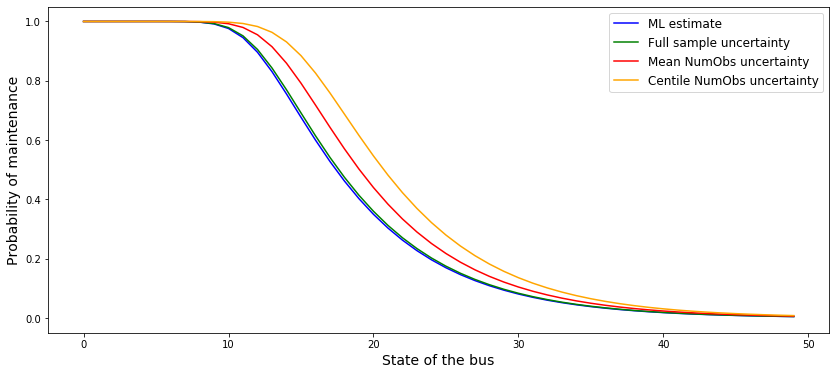

In [7]:
states = range(num_states)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax.set_ylim([-0.05, 1.05])
ax.set_ylabel(r"Probability of maintenance", fontsize=14)
ax.set_xlabel(r"State of the bus", fontsize=14)
ax.plot(states[:], choice_ml[:, 0], color="blue", label="ML estimate")
ax.plot(
    states[:], choice_worst_full[:, 0], color="green", label="Full sample uncertainty"
)
ax.plot(
    states[:], choice_worst_mean[:, 0], color="red", label="Mean NumObs uncertainty"
)

ax.plot(
    states[:],
    choice_worst_ten_percent[:, 0],
    color="orange",
    label="Centile NumObs uncertainty",
)
ax.legend(fontsize=12)
plt.savefig("var_obs_choice.png")
plt.show()

In [8]:
rho_03 = chi2.ppf(0.3, len(p_ml) - 1) / (2 * mean_obs)
worst_trans_03 = get_worst_trans(init_dict, p_ml, rho_03, num_states)
print(worst_trans_03, np.sum(worst_trans_03))
trans_mat_03 = create_transition_matrix(num_states, worst_trans_03)
choice_worst_03 = converge_choice(num_states, trans_mat_03, costs, beta)

[0.33817222 0.64485744 0.01697034] 1.0


In [9]:
rho_06 = chi2.ppf(0.6, len(p_ml) - 1) / (2 * mean_obs)
worst_trans_06 = get_worst_trans(init_dict, p_ml, rho_06, num_states)
print(worst_trans_06, np.sum(worst_trans_06))
trans_mat_06 = create_transition_matrix(num_states, worst_trans_06)
choice_worst_06 = converge_choice(num_states, trans_mat_06, costs, beta)

[0.30671553 0.67320996 0.0200745 ] 0.9999999999999999


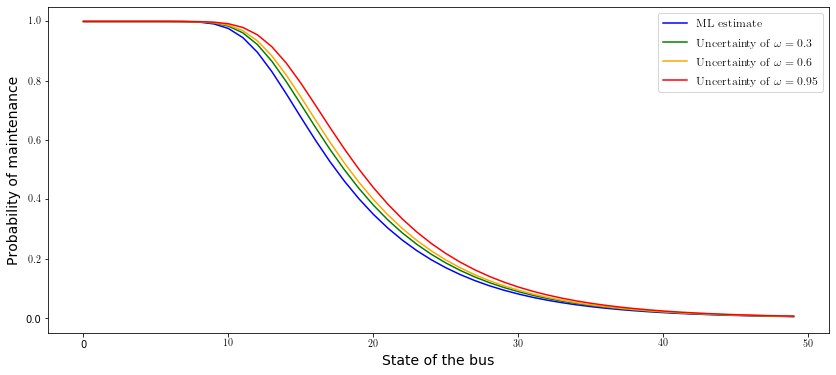

In [10]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax.set_ylim([-0.05, 1.05])

ax.set_ylabel(r"Probability of maintenance", fontsize=14)
ax.set_xlabel(r"State of the bus", fontsize=14)
ax.plot(states[:], choice_ml[:, 0], color="blue", label="ML estimate")
ax.plot(
    states[:], choice_worst_03[:, 0], color="green", label="Uncertainty of $\omega = "
                                                           "0.3$"
)
ax.plot(
    states[:], choice_worst_06[:, 0], color="orange", label="Uncertainty of $\omega = 0.6$"
)
ax.plot(
    states[:], choice_worst_mean[:, 0], color="red", label="Uncertainty of $\omega = 0.95$"
)

ax.legend(fontsize=12)
plt.savefig("var_omega_choice.png")
plt.show()